# Coding Project 1 : Linear Regression

**Please write the names of all group members here:** 
Ramon Kaspar,
Cyrill Stotz

---


*Note:* The provided structure for the code below is only suggestive, and if you want to structure your programs differently you may do so.

### Question 1 - Importing the data

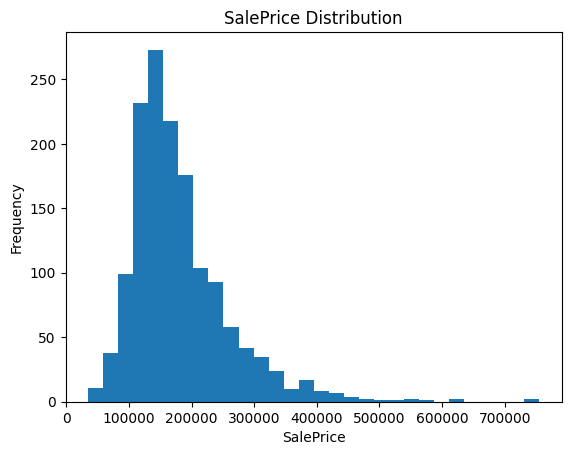

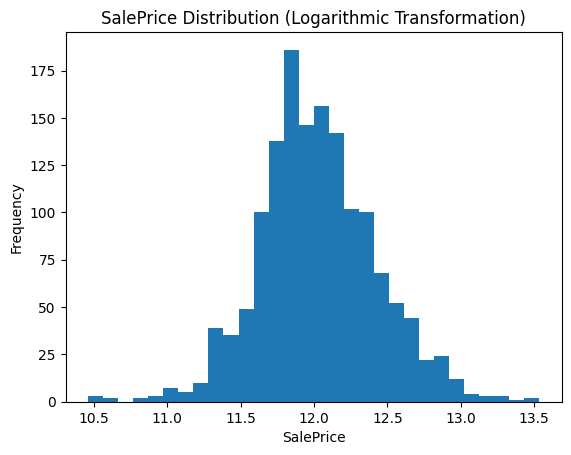

C:\Users\ramon\AppData\Local\Temp\ipykernel_11788\403529142.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode, inplace=True)


In [20]:
#For Question 1, you can import the following packages:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

#1.a) Import the dataset Housing.csv into Python as a pandas DataFrame and call it Housing.
#Remember that the first column of the csv file is an index column and not an explanatory variable.
data = pd.read_csv('Housing.csv', index_col=0)  # We ignore the "Id" column
# print(data.head())
assert data.shape == (1460, 80)  # We have 1460 rows and 80 columns (79 variables + SalePrice) in the dataset

#1.b) Determine graphically whether the target variable SalePrice exhibits a Gaussian distribution. 
# NOTE: We plot a histogram of the "SalePrice" variable
plt.hist(data['SalePrice'], bins = 30)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#If not, suggest a suitable transformation to bring SalePrice close to a Gaussian distribution (logarithmic, inverse, square-root, ...).
# NOTE: We apply a logarithmic transformation to the "SalePrice" variable, then plot the histogram
salePrice_transformed = np.log(data['SalePrice'])

plt.hist(salePrice_transformed, bins = 30)
plt.title('SalePrice Distribution (Logarithmic Transformation)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# TODO: Maybe perform a statistical test to confirm that the log-transformation is approximately normally distributed

#Do not forget to apply this transformation to the target variable SalePrice in the dataset and perform the regressions of Q2-Q3 on this transformed target.
data['SalePrice'] = salePrice_transformed

#1.c) Use one-hot encoding for the categorical features using the default function pd.get_dummies(...).
# NOTE: First, we identify the categorical features in the dataset
categorical_columns = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

# Numerical columns, are those that are not categorical
numeric_columns = [col for col in data.columns if col not in categorical_columns]

# TODO: Make sure we have the correct number of categorical and numerical columns
assert len(categorical_columns) == 43
assert len(numeric_columns) == 37   # +1 for the "SalePrice" column
assert len(numeric_columns) + len(categorical_columns) == len(data.columns)

data_encoded = pd.get_dummies(data, columns=categorical_columns)    # One-hot encoding
# print(data_encoded.head())

# Check if there are missing categorical values; if yes, replace them with the mode of their respective columns
for col in categorical_columns:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

#Replace missing numeric values (NaN’s) with the mean of their respective columns using pd.fillna(...).
data_encoded[numeric_columns] = data_encoded[numeric_columns].fillna(data_encoded[numeric_columns].mean())
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

#1.d) Create a second pandas DataFrame from Housing without the categorical features (i.e. no more dummy variables). Call it Housing2.
Housing2 = data[numeric_columns]
# print(Housing2.head())

**COMMENTS**:
- We plotted the SalePrice data (a Histogram) to see the distribution of the data and to judge, whether the data is normally distributed or not.
- We observed that the distribution of the SalePrice variable appears to be right-skewed.
- Therefore, we applied a log transformation.
- The histogram of the log-transformed SalePrice data is more symmetric than the original data, and visually it appears to be normally distributed.
- *TODO: Maybe verify the normality of the data using a statistical test?*
- We filtered all categorical variables, and applied one-hot-encoding.
- For all numerical variables, we replaced missing values with the mean (of the corresponding column)
- Finally, created the "Housing2" dataframe, which contains the numerical variables (no missing values now), and the "SalePrice" variable is log-transformed.

### Question 2 - Linear Regression on Housing2

In [21]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

#2.a) Split the Housing2 data into a training set (X,Y)_train and a test set (X, Y)_test. 
#Randomly assign 70% of the observations to the training set and the remaining 30% to the test set.
X = Housing2.drop(columns=['SalePrice'])  # Design matrix
Y = Housing2['SalePrice']  
assert X.shape[0] == Y.shape[0] == 1460
assert X.shape[1] == 36

#Split, using: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=69)   # set random state for reproducibility

assert X_test.shape[0] == 0.3 * 1460

In [25]:
#2.b) Fit a linear regression model on the training dataset (X, Y)_train using the sklearn package.
# Output a table with the name of each feature and the associated regression coefficient. 
beta = LinearRegression().fit(X_train, Y_train)
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": beta.coef_})
print("Coefficient Table:")
print(coefficients)

# Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2 of your linear regression model.
print("\nIn-sample MSE (Lin. Reg. sklearn): ", mean_squared_error(Y_train, beta.predict(X_train)))
print("Out-of-sample MSE (Lin. Reg. sklearn): ", mean_squared_error(Y_test, beta.predict(X_test)))
print("In-sample R^2 (Lin. Reg. sklearn): ", r2_score(Y_train, beta.predict(X_train)))
print("Out-of-sample R^2 (Lin. Reg. sklearn): ", r2_score(Y_test, beta.predict(X_test)))

#2.c) (i) Compute the estimated coefficients for each explanatory variable using the numpy package. Remember that the design matrix A needs to include a column of 1's.
A = np.column_stack((np.ones(X_train.shape[0]), X_train))
A_test = np.column_stack((np.ones(X_test.shape[0]), X_test))    # Design matrix for the test set (for out-of-sample calculations)

# Compute the coefficients using the formula: beta = (A^T A)^(-1) A^T Y 
inverse = np.linalg.inv(A.T @ A)
beta_numpy = inverse @ A.T @ Y_train
print(np.__version__)

#	  (ii) Compute the standard error of each estimated coefficient using the numpy package.
m, d = A.shape
d = d - 1 # Number of features (remove the intercept)
tmp = np.sum((Y_train - (A @ beta_numpy))**2) / (m - d - 1) 
se_beta = np.sqrt(tmp * np.diag(inverse))
print("\nStandard Errors (numpy, 'normal' inverse):")
print(pd.DataFrame({"Feature": ["Intercept"] + list(X_train.columns), "Standard Error": se_beta}))

#     (iii) Compute the (in-sample) MSE and R^2 using the numpy package.
print("\nIn-sample MSE (numpy, 'normal' inverse): ", mean_squared_error(Y_train, A @ beta_numpy))
print("Out-of-sample MSE (numpy, 'normal' inverse): ", mean_squared_error(Y_test, A_test @ beta_numpy))
print("In-sample R^2 (numpy, 'normal' inverse): ", r2_score(Y_train, A @ beta_numpy))
print("Out-of-sample R^2 (numpy, 'normal' inverse): ", r2_score(Y_test, A_test @ beta_numpy))

#     (iv) Do the results change using pseudoinversion instead of standard matrix inversion in (i) and (ii)?
# We repeat the step from above, just using the pseudoinverse now
# NOTE: For an interpretation see comments markdown cell below
inverse_pseudo = np.linalg.pinv(A.T @ A)
beta_numpy_pseudo = inverse_pseudo @ A.T @ Y_train
tmp_pseudo = np.sum((Y_train - (A @ beta_numpy_pseudo))**2) / (m - d - 1)  # TODO: Squated resiudals (differ from task description)
se_beta_pseudo = np.sqrt(tmp_pseudo * np.diag(inverse_pseudo))
print("\nStandard Errors (numpy, pseudoinversion):")
print(pd.DataFrame({"Feature": ["Intercept"] + list(X_train.columns), "Standard Error": se_beta_pseudo}))
print("\nIn-sample MSE (numpy, pseudoinversion): ", np.mean((Y_train - A @ beta_numpy_pseudo)**2))
print("Out-of-sample MSE (numpy, pseudoinversion): ", np.mean((Y_test - A_test @ beta_numpy_pseudo)**2))
print("In-sample R^2 (numpy, pseudoinversion): ", 1 - np.sum((Y_train - A @ beta_numpy_pseudo)**2) / np.sum((Y_train - np.mean(Y_train))**2))
print("Out-of-sample R^2 (numpy, pseudoinversion): ", 1 - np.sum((Y_test - A_test @ beta_numpy_pseudo)**2) / np.sum((Y_test - np.mean(Y_test))**2))

#     (v) Compare your results (i), (ii), (iii) (with and without pseudoinversion) to the output of the sm.OLS function. 
# We repeat the step from above, just using the OLS function now
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_sm).fit()
beta_sm = model.params.values
se_sm = model.bse.values    # Source: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.bse.html
print("\nStandard Errors (sm.OLS):")
print(pd.DataFrame({"Feature": ["Intercept"] + list(X_train.columns), "Standard Error": se_sm}))
print("\nIn-sample MSE (sm.OLS): ", np.mean((Y_train - X_train_sm @ beta_sm)**2))
print("Out-of-sample MSE (sm.OLS): ", np.mean((Y_test - sm.add_constant(X_test) @ beta_sm)**2))
print("In-sample R^2 (sm.OLS): ", 1 - np.sum((Y_train - X_train_sm @ beta_sm)**2) / np.sum((Y_train - np.mean(Y_train))**2))
print("Out-of-sample R^2 (sm.OLS): ", 1 - np.sum((Y_test - sm.add_constant(X_test) @ beta_sm)**2) / np.sum((Y_test - np.mean(Y_test))**2))

#2.d) Suggest instead a second-order polynomial regression model (including all quadratic and mixed terms) to predict the (transformed) SalePrice.
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#Does this improve the linear regression model 2.b)? 
b_poly = LinearRegression().fit(X_train_poly, Y_train)

print("Polynomial Regression In-sample MSE:", mean_squared_error(Y_train, b_poly.predict(X_train_poly)))
print("Polynomial Regression Out-of-sample MSE:", mean_squared_error(Y_test, b_poly.predict(X_test_poly)))
print("Polynomial Regression In-sample R^2:", r2_score(Y_train, b_poly.predict(X_train_poly)))
print("Polynomial Regression Out-of-sample R^2:", r2_score(Y_test, b_poly.predict(X_test_poly)))

#What happens with higher-order polynomial regression models?
# NOTE: It overfits, as the out-of-sample MSE increases, and the out-of-sample R^2 decreases

# Polynomial regression with degree 3
poly_features = PolynomialFeatures(degree=3)
X_train_poly_degree_3 = poly_features.fit_transform(X_train)
X_test_poly_degree_3 = poly_features.transform(X_test)

b_poly_degree_3 = LinearRegression().fit(X_train_poly_degree_3, Y_train)

print("\nPolynomial Regression (Degree 3) In-sample MSE:", mean_squared_error(Y_train, b_poly_degree_3.predict(X_train_poly_degree_3)))
print("Polynomial Regression (Degree 3) Out-of-sample MSE:", mean_squared_error(Y_test, b_poly_degree_3.predict(X_test_poly_degree_3)))
print("Polynomial Regression (Degree 3) In-sample R^2:", r2_score(Y_train, b_poly_degree_3.predict(X_train_poly_degree_3)))
print("Polynomial Regression (Degree 3) Out-of-sample R^2:", r2_score(Y_test, b_poly_degree_3.predict(X_test_poly_degree_3)))

Coefficient Table:
          Feature   Coefficient
0      MSSubClass -7.488929e-04
1     LotFrontage -2.216404e-05
2         LotArea  1.864295e-06
3     OverallQual  8.470847e-02
4     OverallCond  4.506327e-02
5       YearBuilt  2.906979e-03
6    YearRemodAdd  1.120730e-03
7      MasVnrArea  2.631184e-05
8      BsmtFinSF1  2.667255e-05
9      BsmtFinSF2  2.050627e-05
10      BsmtUnfSF  1.741138e-05
11    TotalBsmtSF  6.459020e-05
12       1stFlrSF  2.576983e-05
13       2ndFlrSF  3.238068e-05
14   LowQualFinSF  1.075373e-04
15      GrLivArea  1.656878e-04
16   BsmtFullBath  7.248920e-02
17   BsmtHalfBath  4.200034e-02
18       FullBath  3.253432e-02
19       HalfBath  2.189774e-02
20   BedroomAbvGr -3.942670e-03
21   KitchenAbvGr -2.919485e-02
22   TotRmsAbvGrd  1.203989e-02
23     Fireplaces  4.233909e-02
24    GarageYrBlt -6.274437e-05
25     GarageCars  7.561287e-02
26     GarageArea -1.109240e-07
27     WoodDeckSF  1.002019e-04
28    OpenPorchSF -1.145295e-04
29  EnclosedPorch  2.

C:\Users\ramon\AppData\Local\Temp\ipykernel_11788\543242469.py:27: RuntimeWarning: invalid value encountered in sqrt
  se_beta = np.sqrt(tmp * np.diag(inverse))


Polynomial Regression In-sample MSE: 0.004201553458664126
Polynomial Regression Out-of-sample MSE: 126.1482258109411
Polynomial Regression In-sample R^2: 0.9743555509794597
Polynomial Regression Out-of-sample R^2: -846.2408295295097

Polynomial Regression (Degree 3) In-sample MSE: 2.2746202579698166e-18
Polynomial Regression (Degree 3) Out-of-sample MSE: 711.336026008988
Polynomial Regression (Degree 3) In-sample R^2: 1.0
Polynomial Regression (Degree 3) Out-of-sample R^2: -4776.498223822097


In [27]:
"""
Here we nicely plot a table with all the results of the different settings: 
    1) Linear regression using sklearn
    2) Linear regression using numpy
    3) Linear regression using numpy with pseudoinversion
    4) Linear regression using sm.OLS
    5) Polynomial regression (with degree 2)
    6) Polynomial regression (with degree 3)
"""

results_df = pd.DataFrame({
    'Method': [
        'Linear Regression (sklearn)',
        'Linear Regression (numpy inverse)',
        'Linear Regression (numpy pseudoinverse)',
        'Linear Regression (statsmodels OLS)',
        'Polynomial Regression (degree 2)'
        'Polynomial Regression (degree 3)'
    ],
    'In-sample MSE': [
        mean_squared_error(Y_train, beta.predict(X_train)),
        mean_squared_error(Y_train, A @ beta_numpy),
        mean_squared_error(Y_train, A @ beta_numpy_pseudo),
        mean_squared_error(Y_train, model.predict(X_train_sm)),
        mean_squared_error(Y_train, b_poly.predict(X_train_poly)),
        mean_squared_error(Y_train, b_poly_degree_3.predict(X_train_poly_degree_3))
    ],
    'Out-of-sample MSE': [
        mean_squared_error(Y_test, beta.predict(X_test)),
        mean_squared_error(Y_test, np.column_stack((np.ones(X_test.shape[0]), X_test)) @ beta_numpy),
        mean_squared_error(Y_test, np.column_stack((np.ones(X_test.shape[0]), X_test)) @ beta_numpy_pseudo),
        mean_squared_error(Y_test, model.predict(sm.add_constant(X_test))),
        mean_squared_error(Y_test, b_poly.predict(X_test_poly)),
        mean_squared_error(Y_test, b_poly_degree_3.predict(X_test_poly_degree_3))
    ],
    'In-sample R²': [
        r2_score(Y_train, beta.predict(X_train)),
        r2_score(Y_train, A @ beta_numpy),
        r2_score(Y_train, A @ beta_numpy_pseudo),
        r2_score(Y_train, model.predict(X_train_sm)),
        r2_score(Y_train, b_poly.predict(X_train_poly)),
        r2_score(Y_train, b_poly_degree_3.predict(X_train_poly_degree_3))
    ],
    'Out-of-sample R²': [
        r2_score(Y_test, beta.predict(X_test)),
        r2_score(Y_test, np.column_stack((np.ones(X_test.shape[0]), X_test)) @ beta_numpy),
        r2_score(Y_test, np.column_stack((np.ones(X_test.shape[0]), X_test)) @ beta_numpy_pseudo),
        r2_score(Y_test, model.predict(sm.add_constant(X_test))),
        r2_score(Y_test, b_poly.predict(X_test_poly)),
        r2_score(Y_test, b_poly_degree_3.predict(X_test_poly_degree_3))
    ],
})

# NOTE: we round
results_df[['In-sample MSE', 'Out-of-sample MSE']] = results_df[['In-sample MSE', 'Out-of-sample MSE']].round(5)
results_df[['In-sample R²', 'Out-of-sample R²']] = results_df[['In-sample R²', 'Out-of-sample R²']].round(5)

# Display the results, we use: https://pypi.org/project/tabulate/
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='psql'))


ValueError: All arrays must be of the same length

**COMMENTS:**
- We specify the design matrix $X$ and target $y$ (i.e., the SalePrice variable).
- We split the data into training and test sets (split 70/30).
- Then we fit a linear regression model (using `sklearn`) to the training data.
- We calculated metrics (R^2, RMSE) in in-sample and out-of-sample data.


- Then we performed the same steps as above, but instead of using the sklearn library, we solved the normal equations directly (using numpy).
- **Observation – Difference from `inv()` vs. `pinv()`:** When using the pseudoinverse (`pinv()`), the results are the same as when using the sklearn library. However, when using the inverse (`inv()`), the results are different. This might be because the matrix $X^TX$ is not invertible (i.e., singular). 
Solving the linear regression using the OLS method from statsmodels, we get the same results as with the sklearn library, and also the same results as with the numpy library using the pseudoinverse. This suggests that the implementation of the OLS Method and sklearn library use the pseudoinverse method.
- **Observation – Polynomial Regression:** We also fitted a model with polynomial features (degree=2). However, we observed overfitting (can be seen by comparing the in-sample and out-of-sample metrics, i.e., the training error is much smaller compared to the linear model, but the test error is a lot higher). This suggests that the model is too complex for the data.

### Question 3 - Regularization techniques on Housing

In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

#3.a) Perform again a linear regression for the (transformed) SalePrice using this time the full Housing DataFrame. 
X_full = data_encoded.drop(columns=['SalePrice'])
y_full = data_encoded['SalePrice']
assert X_full.shape[0] == y_full.shape[0] == 1460
print("Number of features in full dataset:", X_full.shape[1])
print("Number of observations in full dataset:", X_full.shape[0])

# Convert boolean (True/False) to numeric (1.0/0.0) after one-hot encoding
X_full = X_full.astype(float)

# Use same split as before (i.e., the same indices)
train_indices = X_train.index
test_indices = X_test.index

X_train_full = X_full.loc[train_indices]
X_test_full = X_full.loc[test_indices]
Y_train_full = y_full.loc[train_indices]
Y_test_full = y_full.loc[test_indices] 

# Pefrom linear regression
beta_full = LinearRegression().fit(X_train_full, Y_train_full)

Y_train_pred_full = beta_full.predict(X_train_full)
Y_test_pred_full = beta_full.predict(X_test_full)

#How do the in-sample and out-of-sample MSE and R^2 metrics compare to the results of Question 2.b) on the Housing2 DataFrame?
print("\nLinear Regression on Full Dataset (Using one-hot-encoding for categorical variables):")
print("In-sample MSE:", mean_squared_error(Y_train_full, Y_train_pred_full))
print("Out-of-sample MSE:", mean_squared_error(Y_test_full, Y_test_pred_full))
print("In-sample R^2:", r2_score(Y_train_full, Y_train_pred_full))
print("Out-of-sample R^2:", r2_score(Y_test_full, Y_test_pred_full))

#3.b)  Implement the truncated pseudoinverse, Ridge and Lasso regularization techniques. 
#Use 8-fold cross-validation to tune the hyperparameters of each regularization technique based on the MSE metric.

# TODO: Maybe standardize the data before applying the regularization techniques?

# == Truncated Pseudoinverse ==

def truncated_pseudoinverse(X, y, k):
    """Calculate the coefficients of the linear regression model using the truncated pseudoinverse technique.
    k is the number of singular values to retain, i.e. the rank."""
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    U, s, Vt = np.linalg.svd(X_with_intercept, full_matrices=False)
    # Retain only the top k singular values
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    S_k_inv = np.diag(1 / s_k) # Compute the pseudoinverse
    X_pseudo_truncated = Vt_k.T @ S_k_inv @ U_k.T
    beta = X_pseudo_truncated @ y
    return beta

max_rank = min(X_train_full.shape[0], X_train_full.shape[1])  # Max possible rank
ranks = range(1, max_rank + 1, 10)  # 10 steps

kf = KFold(n_splits=8) # 8-fold cross-validation

trunc_cv_mse = [] # Keep track of the MSE for each rank
trunc_cv_mse_in_sample = [] # Keep track of the in-sample MSE for each rank

for k in ranks:
    trunc_mse_fold = []
    trunc_mse_fold_in_sample = []
    for train_idx, val_idx in kf.split(X_train_full):
        X_train_cv, X_val_cv = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
        y_train_cv, y_val_cv = Y_train_full.iloc[train_idx], Y_train_full.iloc[val_idx]
        
        # Compute truncated pseudoinverse
        beta_trunc = truncated_pseudoinverse(X_train_cv, y_train_cv, k) 
        
        # Compute MSE on validation set
        y_val_pred = np.hstack([np.ones((X_val_cv.shape[0], 1)), X_val_cv]) @ beta_trunc
        trunc_mse_fold.append(mean_squared_error(y_val_cv, y_val_pred))
        trunc_mse_fold_in_sample.append(mean_squared_error(y_train_cv, np.hstack([np.ones((X_train_cv.shape[0], 1)), X_train_cv]) @ beta_trunc))
    
    trunc_cv_mse.append(np.mean(trunc_mse_fold))
    trunc_cv_mse_in_sample.append(np.mean(trunc_mse_fold_in_sample))

# Find rank with lowest MSE
print("\n== Truncated Pseudoinverse: ==")
optimal_rank = ranks[np.argmin(trunc_cv_mse)]
# Fit the model with the optimal rank
beta_trunc = truncated_pseudoinverse(X_train_full, Y_train_full, optimal_rank)
X_train_full_with_intercept = np.hstack([np.ones((X_train_full.shape[0], 1)), X_train_full])
X_test_full_with_intercept = np.hstack([np.ones((X_test_full.shape[0], 1)), X_test_full])
print("\nOptimal rank for Truncated Pseudoinverse:", optimal_rank)
print(f"In-sample MSE (Truncated Pseudoinverse, with rank={optimal_rank}):", mean_squared_error(Y_train_full, X_train_full_with_intercept @ beta_trunc))
print(f"Out-of-sample MSE (Truncated Pseudoinverse, with rank={optimal_rank}):", mean_squared_error(Y_test_full, X_test_full_with_intercept @ beta_trunc))
print(f"In-sample R^2 (Truncated Pseudoinverse, with rank={optimal_rank}):", r2_score(Y_train_full, X_train_full_with_intercept @ beta_trunc))
print(f"Out-of-sample R^2 (Truncated Pseudoinverse, with rank={optimal_rank}):", r2_score(Y_test_full, X_test_full_with_intercept @ beta_trunc))



# == Ridge & Lasso Regression ==
# Reference: https://scikit-learn.org/stable/modules/grid_search.html 

# Define the hyperparameters to tune
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]   # For Ridge and Lasso, logaritmic scale

# Ridge regression
ridge_cv_mse = []
lasso_cv_mse = []
ridge_cv_mse_in_sample = []
lasso_cv_mse_in_sample = []

kf = KFold(n_splits=8)  # 8-fold cross-validation

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    ridge_mse_fold = []
    lasso_mse_fold = []
    ridge_mse_fold_in_sample = []
    lasso_mse_fold_in_sample = []
    
    for train_idx, val_idx in kf.split(X_train_full):
        X_train_cv, X_val_cv = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
        y_train_cv, y_val_cv = Y_train_full.iloc[train_idx], Y_train_full.iloc[val_idx]
        
        # Fit the models
        ridge.fit(X_train_cv, y_train_cv)
        lasso.fit(X_train_cv, y_train_cv)
        
        # Ridge
        y_val_pred_ridge = ridge.predict(X_val_cv) 
        ridge_mse_fold.append(mean_squared_error(y_val_cv, y_val_pred_ridge))
        ridge_mse_fold_in_sample.append(mean_squared_error(y_train_cv, ridge.predict(X_train_cv)))
        
        # Lasso
        y_val_pred_lasso = lasso.predict(X_val_cv) 
        lasso_mse_fold.append(mean_squared_error(y_val_cv, y_val_pred_lasso))
        lasso_mse_fold_in_sample.append(mean_squared_error(y_train_cv, lasso.predict(X_train_cv)))
        
    # Average MSE across folds
    ridge_cv_mse.append(np.mean(ridge_mse_fold))
    lasso_cv_mse.append(np.mean(lasso_mse_fold))

    # Average MSE in-sample
    ridge_cv_mse_in_sample.append(np.mean(ridge_mse_fold_in_sample))
    lasso_cv_mse_in_sample.append(np.mean(lasso_mse_fold_in_sample))
    
# Find the optimal alpha for Ridge and Lasso
best_alpha_ridge = alphas[np.argmin(ridge_cv_mse)]
best_alpha_lasso = alphas[np.argmin(lasso_cv_mse)]

print("\n== Ridge Regression ==")
print("Best alpha for Ridge:", best_alpha_ridge)

# Fit Ridge model with best alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_full, Y_train_full)
print("In-sample MSE (Ridge):", mean_squared_error(Y_train_full, ridge_best.predict(X_train_full)))
print("Out-of-sample MSE (Ridge):", mean_squared_error(Y_test_full, ridge_best.predict(X_test_full)))
print("In-sample R² (Ridge):", r2_score(Y_train_full, ridge_best.predict(X_train_full)))
print("Out-of-sample R² (Ridge):", r2_score(Y_test_full, ridge_best.predict(X_test_full)))

print("\n== Lasso Regression ==")
print("Best alpha for Lasso:", best_alpha_lasso)

# Fit Lasso model with best alpha
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_full, Y_train_full)
print("In-sample MSE (Lasso):", mean_squared_error(Y_train_full, lasso_best.predict(X_train_full)))
print("Out-of-sample MSE (Lasso):", mean_squared_error(Y_test_full, lasso_best.predict(X_test_full)))
print("In-sample R² (Lasso):", r2_score(Y_train_full, lasso_best.predict(X_train_full)))
print("Out-of-sample R² (Lasso):", r2_score(Y_test_full, lasso_best.predict(X_test_full)))

#Compare their performance in terms of in-sample and out-of-sample MSE with the linear regressions of Questions 2.b) and 3.a).
# NOTE: We compare the results in the markdown cell below

#3.c) For the  Lasso regularization technique, how many coefficients are non-zero? 
num_nonzero_lasso = np.sum(lasso_best.coef_ != 0)
print("\nNumber of non-zero coefficients in Lasso:", num_nonzero_lasso)

#Compare this number with the number of coefficients retained by the Ridge and truncated pseudoinverse techniques and provide an explanation.
num_nonzero_ridge = np.sum(ridge_best.coef_ != 0)
print("Number of non-zero coefficients in Ridge:", num_nonzero_ridge)
num_nonzero_trunc = np.sum(beta_trunc != 0)
print("Number of non-zero coefficients in Truncated Pseudoinverse:", num_nonzero_trunc)

# Explanation: LASSO shrinks more coefficients. So we have a sparser solution, compared to Ridge and the truncated pseudoinverse.
	
#3.d) Based on your findings from Questions 2 and 3, which model would you recommend? Justify your choice.

Number of features in full dataset: 287
Number of observations in full dataset: 1460

Linear Regression on Full Dataset (Using one-hot-encoding for categorical variables):
In-sample MSE: 0.007263195307599667
Out-of-sample MSE: 0.02557499890558743
In-sample R^2: 0.9556686250396565
Out-of-sample R^2: 0.8282323580161928

== Truncated Pseudoinverse: ==

Optimal rank for Truncated Pseudoinverse: 191
In-sample MSE (Truncated Pseudoinverse, with rank=191): 0.010736182796455683
Out-of-sample MSE (Truncated Pseudoinverse, with rank=191): 0.023138437674572104
In-sample R^2 (Truncated Pseudoinverse, with rank=191): 0.9344710247988971
Out-of-sample R^2 (Truncated Pseudoinverse, with rank=191): 0.8445968700439618


c:\Users\ramon\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.19238e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ramon\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.710e-01, tolerance: 1.454e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ramon\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.07951e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ramon\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge


== Ridge Regression ==
Best alpha for Ridge: 1
In-sample MSE (Ridge): 0.008299193616405028
Out-of-sample MSE (Ridge): 0.027309320011714072
In-sample R² (Ridge): 0.9493453434065884
Out-of-sample R² (Ridge): 0.8165842540244057

== Lasso Regression ==
Best alpha for Lasso: 0.0001
In-sample MSE (Lasso): 0.007820284471887541
Out-of-sample MSE (Lasso): 0.02171059199831051
In-sample R² (Lasso): 0.9522683958591814
Out-of-sample R² (Lasso): 0.8541866137555303

Number of non-zero coefficients in Lasso: 197
Number of non-zero coefficients in Ridge: 282
Number of non-zero coefficients in Truncated Pseudoinverse: 288


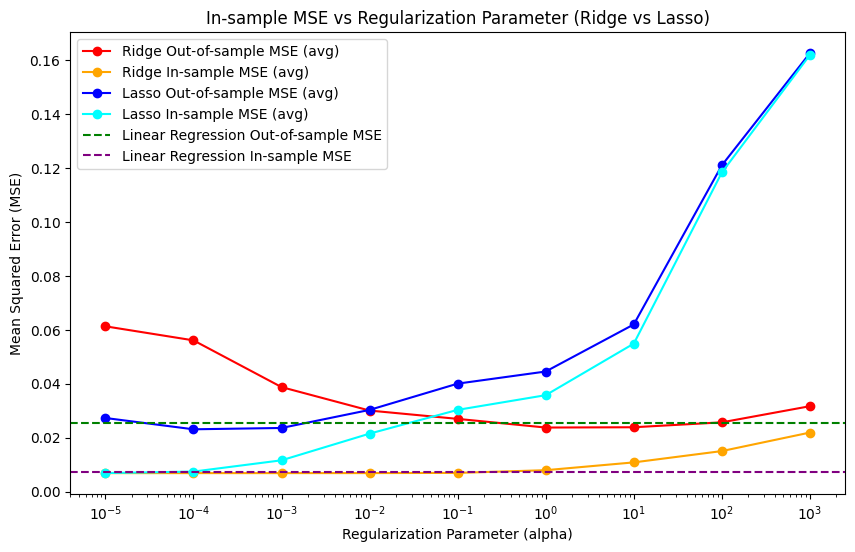

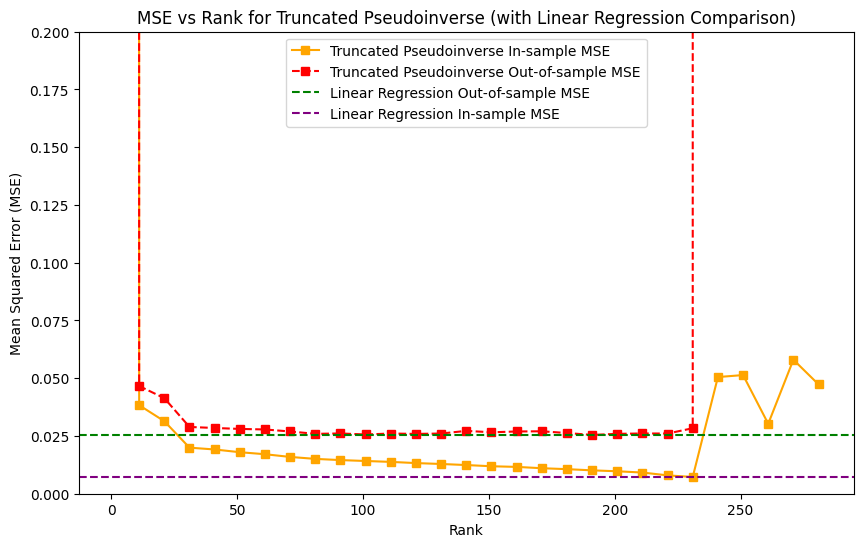

In [126]:
""" 
We plot the MSE (test and train) of LASSO and RIDGE
"""
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_cv_mse, marker='o', color='red', label='Ridge Out-of-sample MSE (avg)')
plt.plot(alphas, ridge_cv_mse_in_sample, marker='o', color='orange', label='Ridge In-sample MSE (avg)')

plt.plot(alphas, lasso_cv_mse, marker='o', color='blue', label='Lasso Out-of-sample MSE (avg)')
plt.plot(alphas, lasso_cv_mse_in_sample, marker='o', color='cyan', label='Lasso In-sample MSE (avg)')

# Add horizontal lines for normal linear regression MSE (no regularization)
lin_reg_out_sample_mse = mean_squared_error(Y_test_full, beta_full.predict(X_test_full))
lin_reg_in_sample_mse = mean_squared_error(Y_train_full, beta_full.predict(X_train_full))
plt.axhline(y=lin_reg_out_sample_mse, color='green', linestyle='--', label='Linear Regression Out-of-sample MSE')
plt.axhline(y=lin_reg_in_sample_mse, color='purple', linestyle='--', label='Linear Regression In-sample MSE')

# Logarithmic scale for the x-axis (since alphas are logarithmic)
plt.xscale('log')

plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('In-sample MSE vs Regularization Parameter (Ridge vs Lasso)')
plt.legend()
plt.show()



# We do a second plot for the Truncated Pseudoinverse
plt.figure(figsize=(10, 6))

plt.plot(ranks, trunc_cv_mse_in_sample, marker='s', color='orange', label='Truncated Pseudoinverse In-sample MSE')
plt.plot(ranks, trunc_cv_mse, marker='s', linestyle='--', color='red', label='Truncated Pseudoinverse Out-of-sample MSE')

plt.axhline(y=lin_reg_out_sample_mse, color='green', linestyle='--', label='Linear Regression Out-of-sample MSE')
plt.axhline(y=lin_reg_in_sample_mse, color='purple', linestyle='--', label='Linear Regression In-sample MSE')

plt.ylim(0, 0.2)  # Y-axis from 0 to 0.2
plt.xlabel('Rank')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Rank for Truncated Pseudoinverse (with Linear Regression Comparison)')
plt.legend()
plt.show()

**COMMENTS:**
- Comparison of Linear Regression on Housing2 (only numerical variables) and on the full dataset (numerical and categorical variables – which are one-hot-encoded): Despite the improved in-sample metrics, the out-of-sample performance did not improve and remained nearly the same. This might indicate that the model with categorical variables is overfitting to the training data and not generalizing better to unseen data.

- We implemented 3 regularization models: Truncated Pseudoinverse, Ridge Regression, and Lasso Regression.
- For Truncated Pseudoinverse, we tested ranks from 1 to the max rank of the data matrix (with steps of 10) and performed 8-fold CV.
- For Ridge and Lasso Regression, we used 8-fold CV to find the optimal hyperparameter $\lambda$. We used a logarithmic scale for the hyperparameter search, from $10^{-5}$ to $10^{5}$.
- **Truncated Pseudoinverse:** We found the optimal rank for this dataset is 191. The in-sample MSE was 0.0107, and the out-of-sample MSE was 0.0231, with an out-of-sample R² of 0.844. 
- **Ridge Regression:** We found that $alpha=1.0$ performed best. Ridge achieved an in-sample R² of 0.949 and an out-of-sample R² of 0.816, with corresponding MSE values of 0.0083 and 0.0273.
- **Lasso Regression:** The optimal value is $alpha = 0.0001$. Lasso achieved the best out-of-sample performance, with R² of 0.854 and MSE of 0.0217, and the in-sample R² was 0.952 with an MSE of 0.0078. 

- Lasso regression has 197 non-zero coefficients (while Ridge has 282 and the full truncated pseudoinverse has 288). This is because lasso has more spare solutions.